In [9]:
import pandas as pd
import numpy as np
import string
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  
sns.set(color_codes=True)

In [10]:
corpus = pd.read_csv('boardgame-comments-sample.csv')

In [11]:
corpus.head()

,Compiled from boardgamegeek.com by Matt Borthwick,gameID,rating,comment
0,25308,37111,8.5,++++ Thematic +++ Bluff - Many randomness I ...
1,54313,12,8.0,"""well, that ugly artwork certainly helped imme..."
2,38165,50,8.0,LOVE this game! If only the GF would play it ...
3,56936,1198,5.0,"SET is a good game, in small doses (in my case..."
4,47675,164153,6.0,"So much better than Descent. Better theme, imp..."


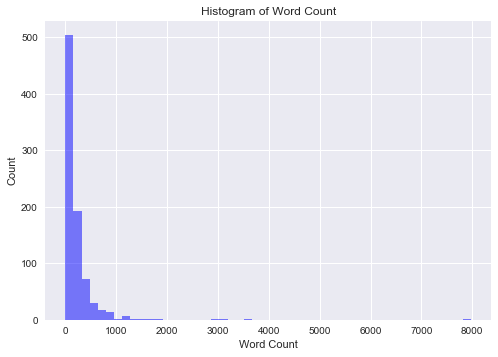

In [12]:
#plot histogram of word count
corpus['word_count']  = corpus.comment.str.len()

num_bins = 50
n, bins, patches = plt.hist(corpus.word_count, num_bins, facecolor='blue', alpha=0.5)

#plt.xticks(range(9000))
plt.title('Histogram of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

In [26]:
#lowercase and remove punctuation
corpus['cleaned'] = corpus['comment'].str.lower().apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

# stopword list to use
stopwords_list = stopwords.words('english')
stopwords_list.extend(('game','play','played','players','player','people','really','board','games','one')) 

stopwords_list[-10:]

#remove stopwords
corpus['cleaned'] = corpus['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
corpus

,Compiled from boardgamegeek.com by Matt Borthwick,gameID,rating,comment,word_count,cleaned,word
0,25308,37111,8.50,++++ Thematic +++ Bluff - Many randomness I ...,407,thematic bluff many randomness like maybe fun ...,1
1,54313,12,8.00,"""well, that ugly artwork certainly helped imme...",100,well ugly artwork certainly helped immerse egy...,0
2,38165,50,8.00,LOVE this game! If only the GF would play it ...,103,love gf would tired end day basic math bad idea,1
3,56936,1198,5.00,"SET is a good game, in small doses (in my case...",374,set good small doses case small doses simple c...,0
4,47675,164153,6.00,"So much better than Descent. Better theme, imp...",329,much better descent better theme improved rule...,0
5,94529,31260,8.00,Very tense and fun and I love pondering my str...,149,tense fun love pondering strategy beginning ra...,0
6,122420,320,6.00,A classic.,11,classic,0
7,55342,161970,4.50,rating based on 2 player game.,30,rating based 2,0
8,147851,13,8.00,"A good game, but sometimes the dice are agains...",51,good sometimes dice,0
9,171066,13291,7.00,Same rating as base game. New characters are g...,118,rating base new characters good doesnt add any...,0


In [20]:
print('Mean: ', corpus.rating.mean())
print('Median: ', corpus.rating.median())
print('Mode: ', corpus.rating.mode())

Mean:  7.2516765053128704
Median:  7.5
Mode:  0    8.0
dtype: float64


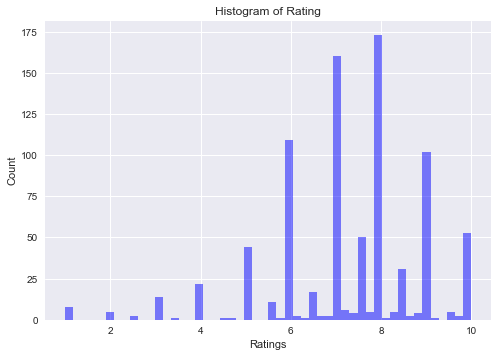

In [15]:
#plot histogram of ratings
num_bins = 50
n, bins, patches = plt.hist(corpus.rating, num_bins, facecolor='blue', alpha=0.5)

#plt.xticks(range(9000))
plt.title('Histogram of Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

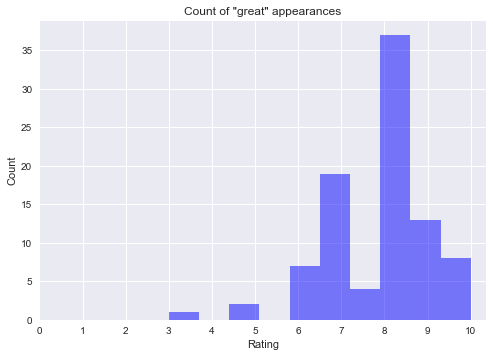

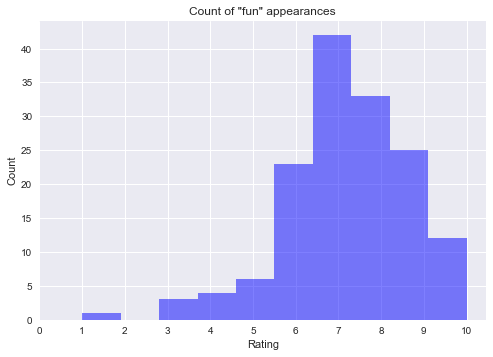

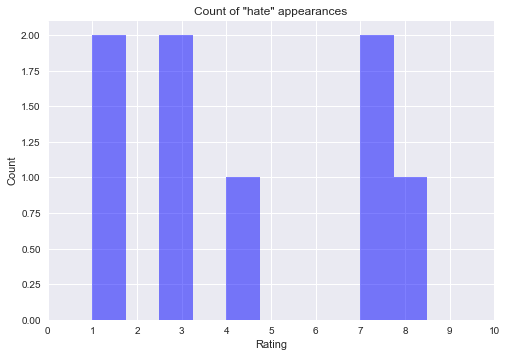

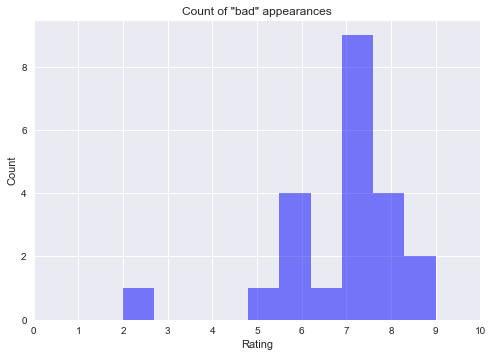

In [16]:
#function that generates a histogram of how often a word appears with a rating

def word_rating(corpus, word):
    corpus['word'] = corpus['cleaned'].apply(lambda x: 1 if word in x.split() else 0)

    filtered = corpus.loc[corpus['word'] == 1]

    num_bins = 10
    n, bins, patches = plt.hist(filtered.rating, num_bins, facecolor='blue', alpha=0.5)

    plt.xticks(range(11))
    plt.title('Count of "' + str(word) + '" appearances')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

word_rating(corpus, "great")
word_rating(corpus, "fun")
word_rating(corpus, "hate")
word_rating(corpus, "bad")

In [17]:
#find top 100 most common words
Counter(" ".join(corpus["cleaned"]).split()).most_common(100)[:50]


[('like', 194),
 ('one', 180),
 ('fun', 165),
 ('really', 156),
 ('games', 149),
 ('good', 140),
 ('much', 132),
 ('cards', 120),
 ('time', 118),
 ('get', 108),
 ('player', 105),
 ('great', 96),
 ('better', 94),
 ('dont', 91),
 ('plays', 87),
 ('would', 83),
 ('well', 78),
 ('lot', 76),
 ('first', 74),
 ('playing', 73),
 ('love', 72),
 ('think', 70),
 ('nice', 67),
 ('still', 65),
 ('best', 64),
 ('easy', 63),
 ('theme', 62),
 ('way', 61),
 ('many', 60),
 ('dice', 60),
 ('simple', 59),
 ('little', 59),
 ('im', 58),
 ('strategy', 57),
 ('long', 56),
 ('even', 55),
 ('rules', 54),
 ('enough', 54),
 ('interesting', 54),
 ('enjoy', 52),
 ('bit', 52),
 ('different', 51),
 ('though', 51),
 ('2', 50),
 ('also', 49),
 ('feel', 48),
 ('card', 48),
 ('luck', 46),
 ('3', 44),
 ('two', 44)]

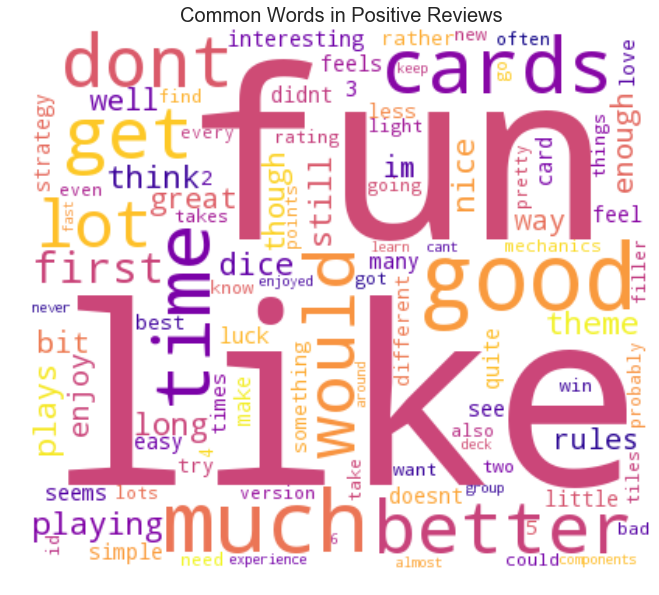

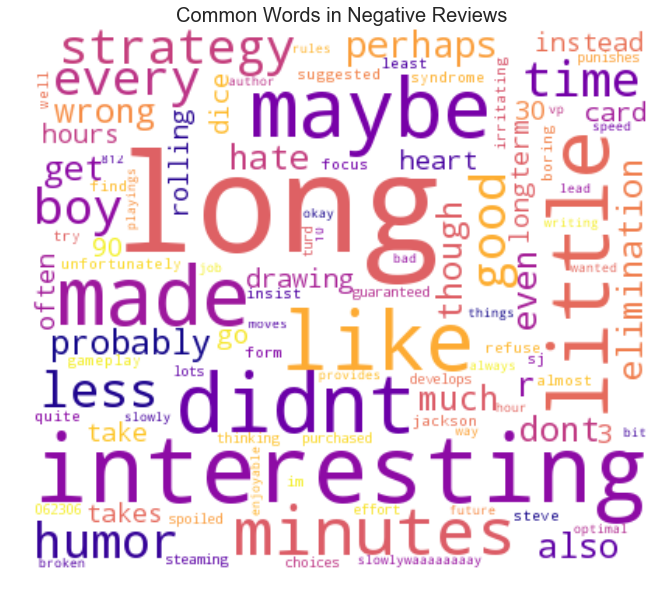

In [28]:
#generate word clouds for both positive and negative reviews
from wordcloud import WordCloud
from collections import Counter

neg = corpus.loc[corpus['rating'] < 3]
pos = corpus.loc[corpus['rating'] < 8]


words = Counter([w for w in " ".join(pos['cleaned']).split()])

wc = WordCloud(width=400, height=350,colormap='plasma',background_color='white').generate_from_frequencies(dict(words.most_common(100)))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words in Positive Reviews', fontsize=20)
plt.axis('off');
plt.show()


words = Counter([w for w in " ".join(neg['cleaned']).split()])

wc = WordCloud(width=400, height=350,colormap='plasma',background_color='white').generate_from_frequencies(dict(words.most_common(100)))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words in Negative Reviews', fontsize=20)
plt.axis('off');
plt.show()
